# Exercício 12 - SVM

Aluno: Giovanni Martins de Sá Júnior - 2017001850

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [8]:
dados = pd.read_csv('Social_Network_Ads.csv')

In [9]:
dados

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [11]:
# 2. Separar os dados em treinamento e teste
X = dados[['Age', 'EstimatedSalary']]
y = dados['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 3. Treinar a SVM
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar e treinar o classificador SVM
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear')

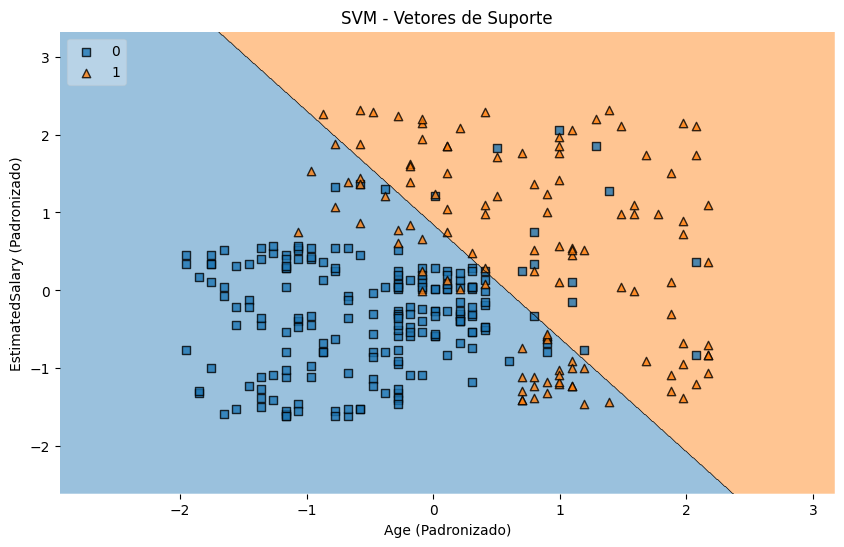

In [19]:
# 4. Plotar os dados no espaço de entrada resaltando os vetores de suporte
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_scaled, y_train.values, clf=svm_classifier, legend=2)
plt.title('SVM - Vetores de Suporte')
plt.xlabel('Age (Padronizado)')
plt.ylabel('EstimatedSalary (Padronizado)')
plt.show()

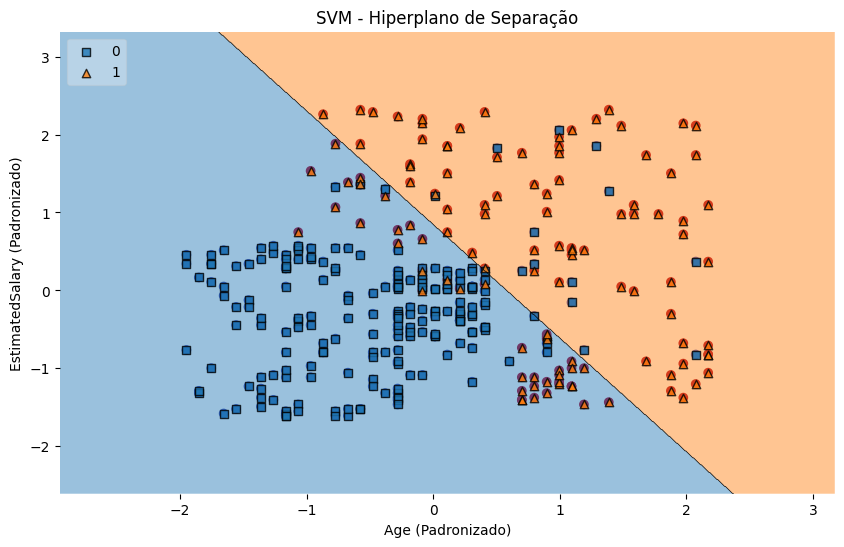

In [21]:
# 5. Plotar os dados no espaço de entrada com o hiperplano de separação
plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='coolwarm')
plot_decision_regions(X_train_scaled, y_train.values, clf=svm_classifier, legend=2)
plt.title('SVM - Hiperplano de Separação')
plt.xlabel('Age (Padronizado)')
plt.ylabel('EstimatedSalary (Padronizado)')
plt.show()


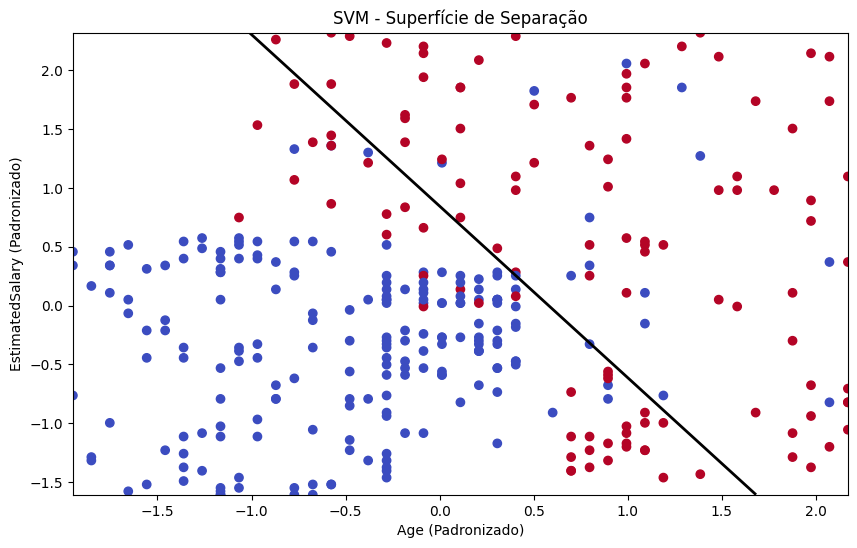

In [22]:
# 6. Plotar a superfície de separação
# (O código abaixo é específico para SVM com 2 features, portanto, adapte conforme necessário para mais features)
xx, yy = np.meshgrid(np.linspace(X_train_scaled[:, 0].min(), X_train_scaled[:, 0].max(), 100),
                     np.linspace(X_train_scaled[:, 1].min(), X_train_scaled[:, 1].max(), 100))

Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='coolwarm')
plt.title('SVM - Superfície de Separação')
plt.xlabel('Age (Padronizado)')
plt.ylabel('EstimatedSalary (Padronizado)')
plt.show()